# Market Sales

Cargamos los datos

In [47]:
import pandas as pd
ds_path = "../datasets/dataset-3/supermarket_sales new.csv"
df = pd.read_csv(ds_path)


In [48]:
df.head(10)

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
5,Female,692-92-5582,B,Mandalay,Member,Food and beverages,54.84,3,8.2260
6,Female,351-62-0822,B,Mandalay,Member,Fashion accessories,14.48,4,2.8960
7,Female,365-64-0515,A,Yangon,Normal,Electronic accessories,46.95,5,11.7375
8,Female,829-34-3910,A,Yangon,Normal,Health and beauty,71.38,10,35.6900
9,Female,299-46-1805,B,Mandalay,Member,Sports and travel,93.72,6,28.1160


Exploramos los datos

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


Se observan tipos de datos que pueden ser ajustados

Observamos los valores unicos de las variables categóricas

In [50]:
from utils.extra import convert_bolean_columns
convert_bolean_columns(df)
df["Gender"] = df["Gender"].astype("category")
df["Invoice ID"] = df["Invoice ID"].astype("category")
df["Branch"] = df["Branch"].astype("category")
df["City"] = df["City"].astype("category")
df["Customer type"] = df["Customer type"].astype("category")
df["Product line"] = df["Product line"].astype("category")


Observamos que la columna taxes no se encuentra bien en todas las entradas

In [51]:

df['Expected Tax'] = (df['Unit price'] * df['Quantity']) * 0.05
# Check if the "Tax 5%" matches the calculated tax
df['Tax Correct'] = df['Tax 5%'].round(2) == df['Expected Tax'].round(2)

# Display rows where the tax calculation is incorrect
incorrect_taxes = df[~df['Tax Correct']]
print(incorrect_taxes)

# Summary of tax correctness
print(f"Number of incorrect taxes: {len(incorrect_taxes)}")
df_sorted = df.sort_values(by="Tax 5%", ascending=False)
df_sorted.head()

     Gender   Invoice ID Branch       City Customer type  \
0    Female  750-67-8428      A     Yangon        Member   
10   Female  656-95-9349      A     Yangon        Member   
23   Female  727-46-3608      B   Mandalay        Member   
28   Female  817-48-8732      A     Yangon        Member   
30   Female  347-34-2234      B   Mandalay        Member   
..      ...          ...    ...        ...           ...   
930    Male  658-66-3967      C  Naypyitaw        Normal   
947    Male  325-89-4209      A     Yangon        Member   
957    Male  450-42-3339      C  Naypyitaw        Normal   
975    Male  577-34-7579      C  Naypyitaw        Member   
991    Male  189-40-5216      C  Naypyitaw        Normal   

               Product line  Unit price  Quantity    Tax 5%  Expected Tax  \
0         Health and beauty       74.69         7  261.4150       26.1415   
10        Health and beauty       68.93         7  241.2550       24.1255   
23       Food and beverages       20.01         

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Expected Tax,Tax Correct
873,Male,756-49-0168,A,Yangon,Member,Fashion accessories,19.70,1,985.0,0.985,False
617,Male,802-43-8934,A,Yangon,Normal,Home and lifestyle,18.28,1,914.0,0.914,False
718,Male,489-64-4354,C,Naypyitaw,Normal,Fashion accessories,16.28,1,814.0,0.814,False
484,Female,593-08-5916,A,Yangon,Normal,Fashion accessories,15.50,1,775.0,0.775,False
129,Female,490-29-1201,A,Yangon,Normal,Sports and travel,15.34,1,767.0,0.767,False


Agregamos una columna del costo total

In [52]:
df['Total Cost'] = (df['Unit price'] * df['Quantity']) + df['Expected Tax']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         1000 non-null   category
 1   Invoice ID     1000 non-null   category
 2   Branch         1000 non-null   category
 3   City           1000 non-null   category
 4   Customer type  1000 non-null   category
 5   Product line   1000 non-null   category
 6   Unit price     1000 non-null   float64 
 7   Quantity       1000 non-null   int64   
 8   Tax 5%         1000 non-null   float64 
 9   Expected Tax   1000 non-null   float64 
 10  Tax Correct    1000 non-null   bool    
 11  Total Cost     1000 non-null   float64 
dtypes: bool(1), category(6), float64(4), int64(1)
memory usage: 87.8 KB


Continuamos con la exploración de los datos

Visualizamos la cabecera, luego las últimas entradas

In [54]:
df.tail(10)

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Expected Tax,Tax Correct,Total Cost
990,Male,148-41-7930,C,Naypyitaw,Normal,Health and beauty,99.96,7,34.9860,34.9860,True,734.7060
991,Male,189-40-5216,C,Naypyitaw,Normal,Electronic accessories,96.37,7,337.2950,33.7295,False,708.3195
992,Male,552-44-5977,B,Mandalay,Member,Health and beauty,62.00,8,24.8000,24.8000,True,520.8000
993,Male,267-62-7380,C,Naypyitaw,Member,Electronic accessories,82.34,10,41.1700,41.1700,True,864.5700
994,Male,430-53-4718,B,Mandalay,Member,Health and beauty,75.37,8,30.1480,30.1480,True,633.1080
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030,5.8030,True,121.8630
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450,8.7450,True,183.6450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175,2.0175,True,42.3675
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920,1.5920,True,33.4320
999,Male,347-56-2442,A,Yangon,Normal,Home and lifestyle,65.82,1,3.2910,3.2910,True,69.1110


Verificamos los valores descriptivos

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.0800,32.875000,55.230,77.93500,99.96
Quantity,1000.0,5.510000,2.923431,1.0000,3.000000,5.000,8.00000,10.00
Tax 5%,1000.0,43.911392,100.551612,1.0660,6.222500,12.404,27.22625,985.00
Expected Tax,1000.0,15.379369,11.708825,0.5085,5.924875,12.088,22.44525,49.65
Total Cost,1000.0,322.966749,245.885335,10.6785,124.422375,253.848,471.35025,1042.65


In [56]:
df.describe(include='category').T

,count,unique,top,freq
Gender,1000,2,Female,501
Invoice ID,1000,1000,898-04-2717,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Product line,1000,6,Fashion accessories,178


## Identificación de valores nulos y outliers

In [57]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


no observamos duplicados

Ahora valores nulos

In [58]:
from utils.extra import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
Gender,1000,0,0.0
Invoice ID,1000,0,0.0
Branch,1000,0,0.0
City,1000,0,0.0
Customer type,1000,0,0.0
Product line,1000,0,0.0
Unit price,1000,0,0.0
Quantity,1000,0,0.0
Tax 5%,1000,0,0.0
Expected Tax,1000,0,0.0


No se visualizan valores nulos

Ahora verificamos los outliers

In [59]:
from utils.extra import get_outliers_data
get_outliers_data(df)

,Unit price,Quantity,Tax 5%,Expected Tax,Total Cost
N° Outliers,0.000,0.0,109.000000,9.000000,9.000000
% Outliers,0.000,0.0,10.900000,0.900000,0.900000
Lim. mix,-34.715,-4.5,-25.283125,-18.855688,-395.969438
Lim. max,145.525,15.5,58.731875,47.225813,991.742062


Visualizamos las gráficas de cajas de nuestras columnas

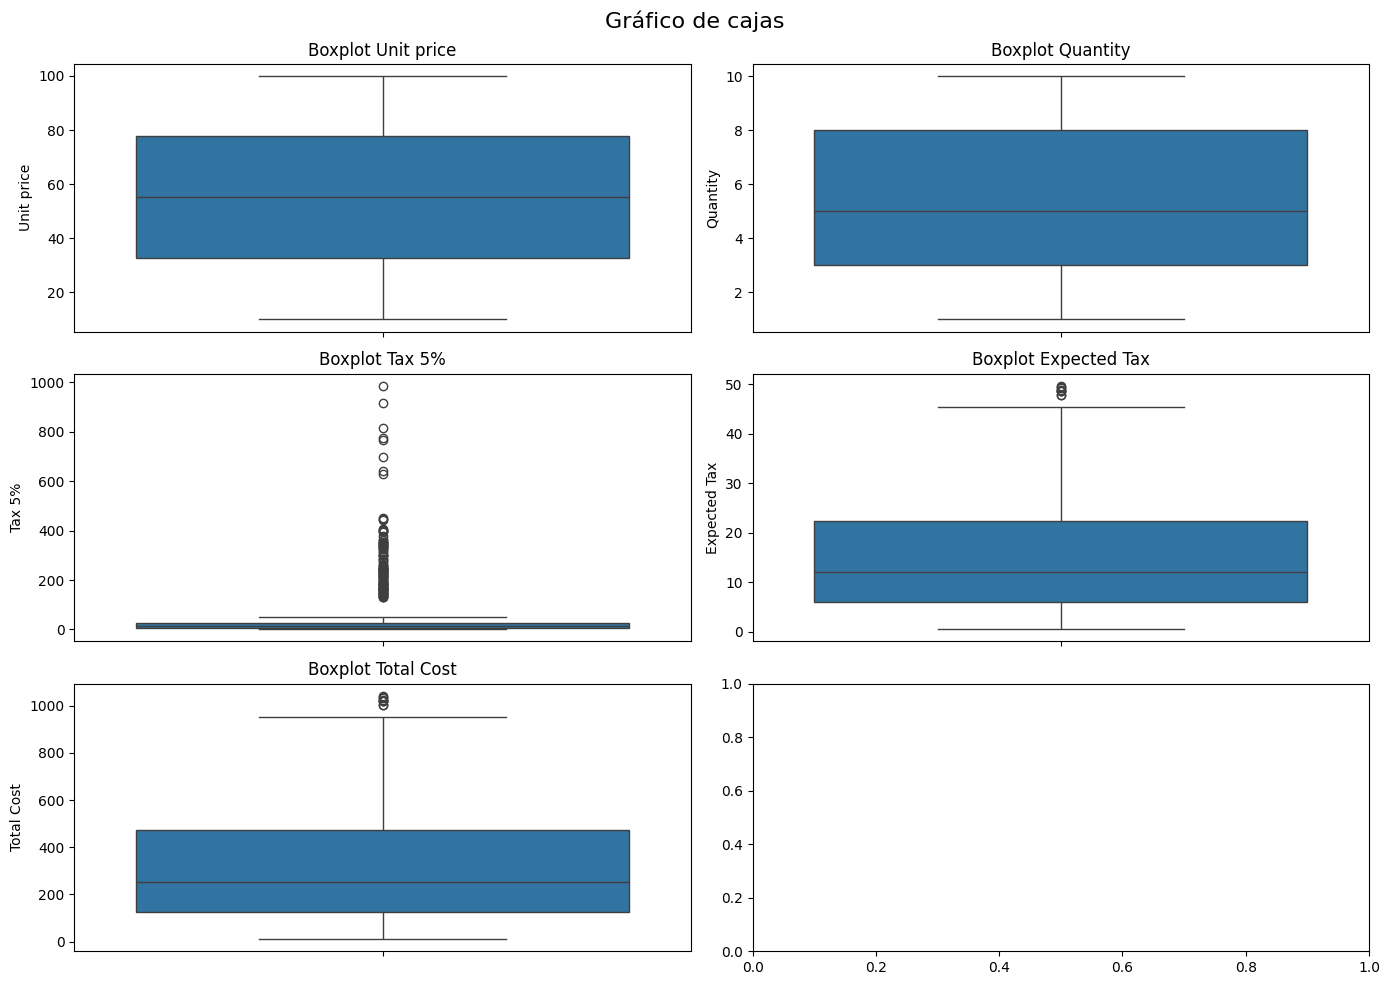

In [60]:
from utils.extra import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df), num_columns=2)

Observamos outliers en varias columnas

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [61]:
df.describe()

,Unit price,Quantity,Tax 5%,Expected Tax,Total Cost
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392,15.379369,322.966749
std,26.494628,2.923431,100.551612,11.708825,245.885335
min,10.080000,1.000000,1.066000,0.508500,10.678500
25%,32.875000,3.000000,6.222500,5.924875,124.422375
50%,55.230000,5.000000,12.404000,12.088000,253.848000
75%,77.935000,8.000000,27.226250,22.445250,471.350250
max,99.960000,10.000000,985.000000,49.650000,1042.650000


In [62]:
from utils.extra import get_descriptive_statistics
get_descriptive_statistics(df)

,Unit price,Quantity,Tax 5%,Expected Tax,Total Cost
min,10.080000,1.000000,1.066000,0.508500,10.678500
max,99.960000,10.000000,985.000000,49.650000,1042.650000
mean,55.672130,5.510000,43.911392,15.379369,322.966749
std,26.494628,2.923431,100.551612,11.708825,245.885335
median,55.230000,5.000000,12.404000,12.088000,253.848000
variation_coefficient,0.475905,0.530568,2.289875,0.761333,0.761333


Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

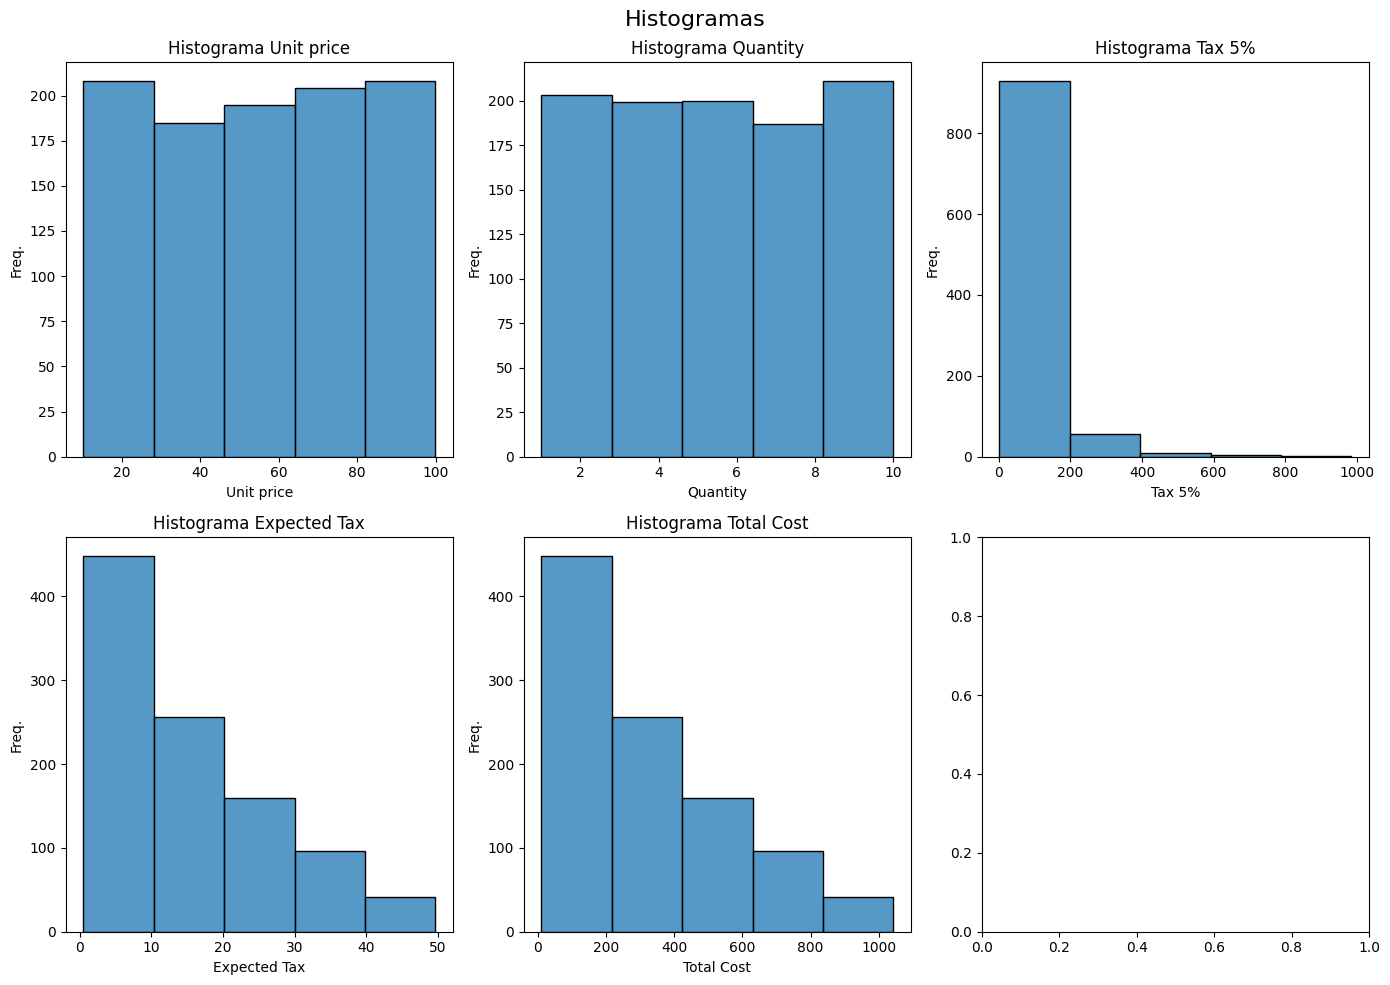

In [63]:
from utils.extra import graph_histogram
graph_histogram(df, get_numeric_columns(df))

No se observa nada fuera de lo normal en las distribuciones

Veremos las correlaciones entre las caracteristicas

In [64]:
from utils.extra import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,Unit price,Quantity,Tax 5%,Expected Tax,Total Cost
Unit price,1.000000,0.010778,0.141954,0.633962,0.633962
Quantity,0.010778,1.000000,0.126736,0.705510,0.705510
Tax 5%,0.141954,0.126736,1.000000,0.266055,0.266055
Expected Tax,0.633962,0.705510,0.266055,1.000000,1.000000
Total Cost,0.633962,0.705510,0.266055,1.000000,1.000000


Ahora graficamos el mapa de calor de las correlaciones

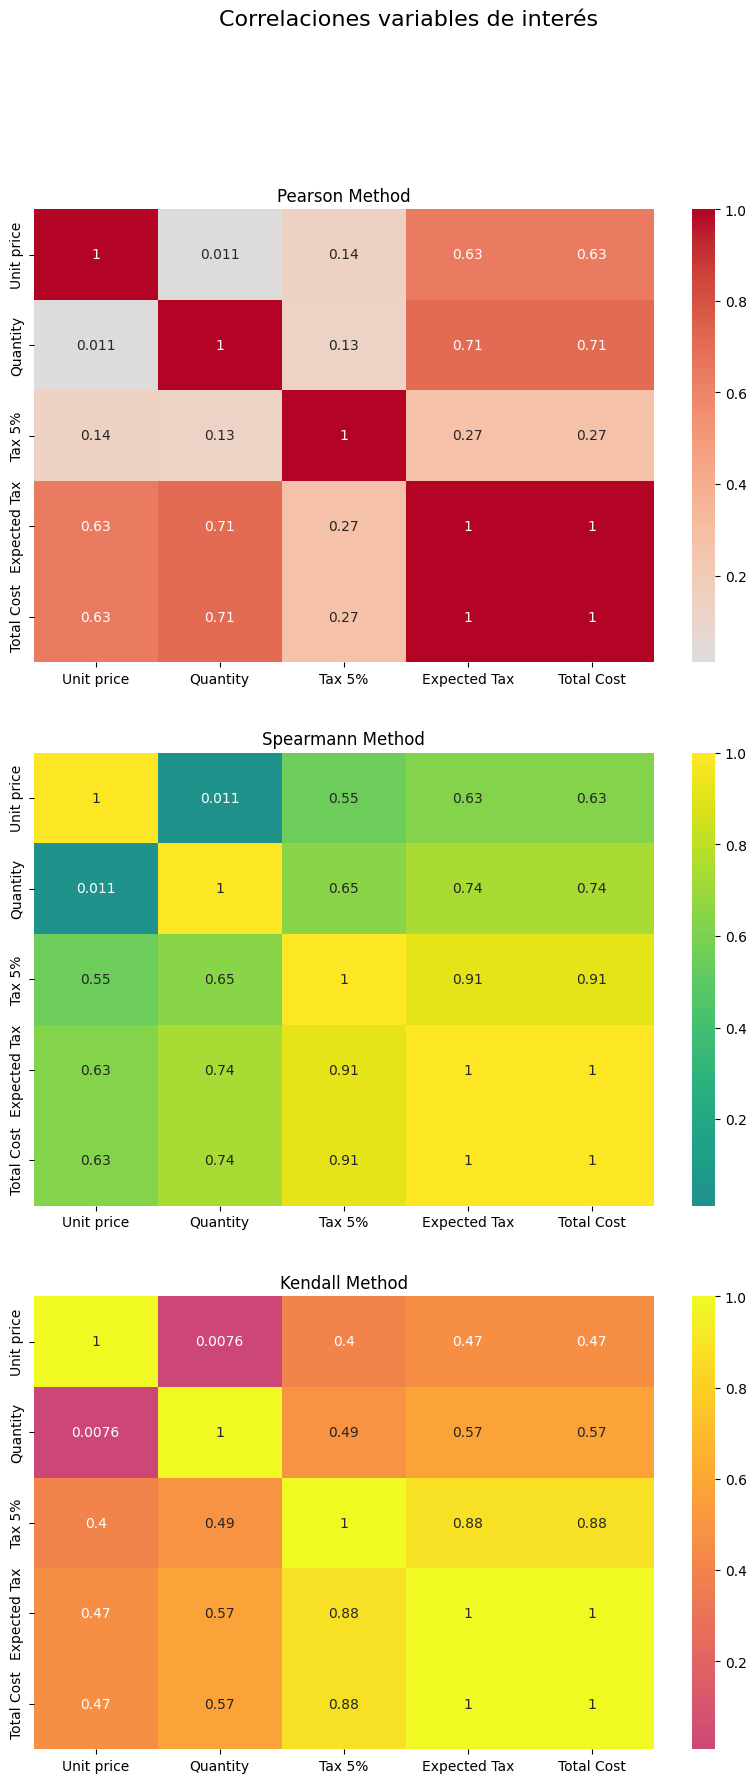

In [65]:
from utils.extra import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (10,20))

Se observan varias correlaciones

Ahora observaremos la dispersión entre las variables

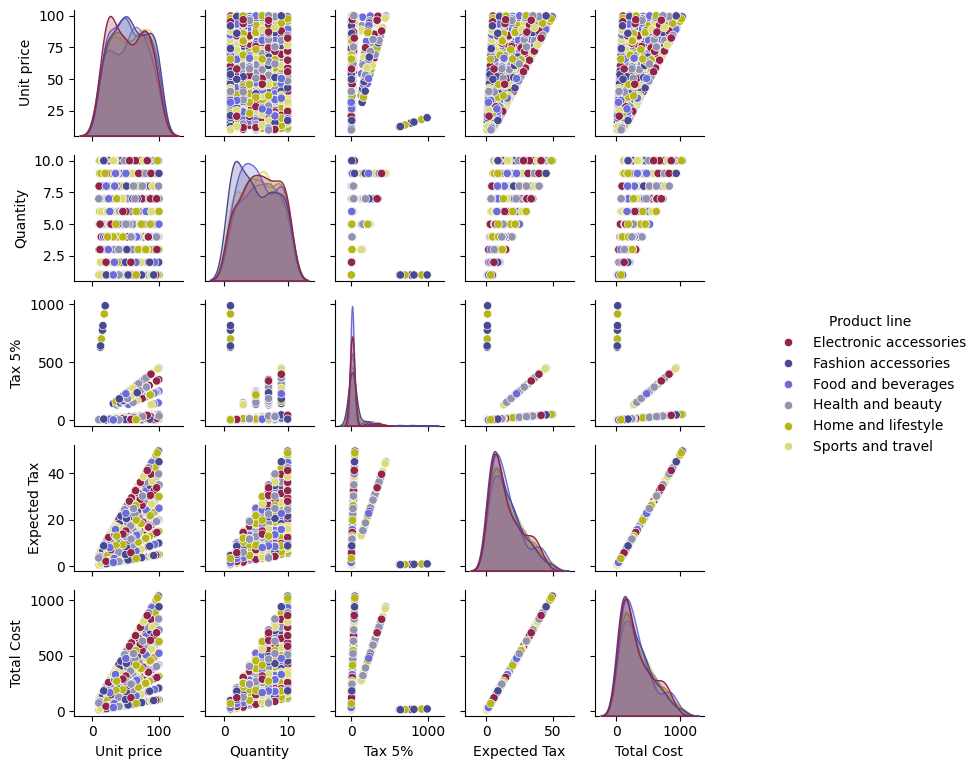

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = get_numeric_columns(df)
palette = sns.color_palette("gist_stern", n_colors=6)
g = sns.pairplot(df[[*numeric_columns] + ["Product line"]], hue='Product line', height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(10, 8)
plt.show()

No se observa ningún patrón a simple vista.
Solamente el problema de las entradas erroneas de impuestos

Ahora las observamos con más detalles

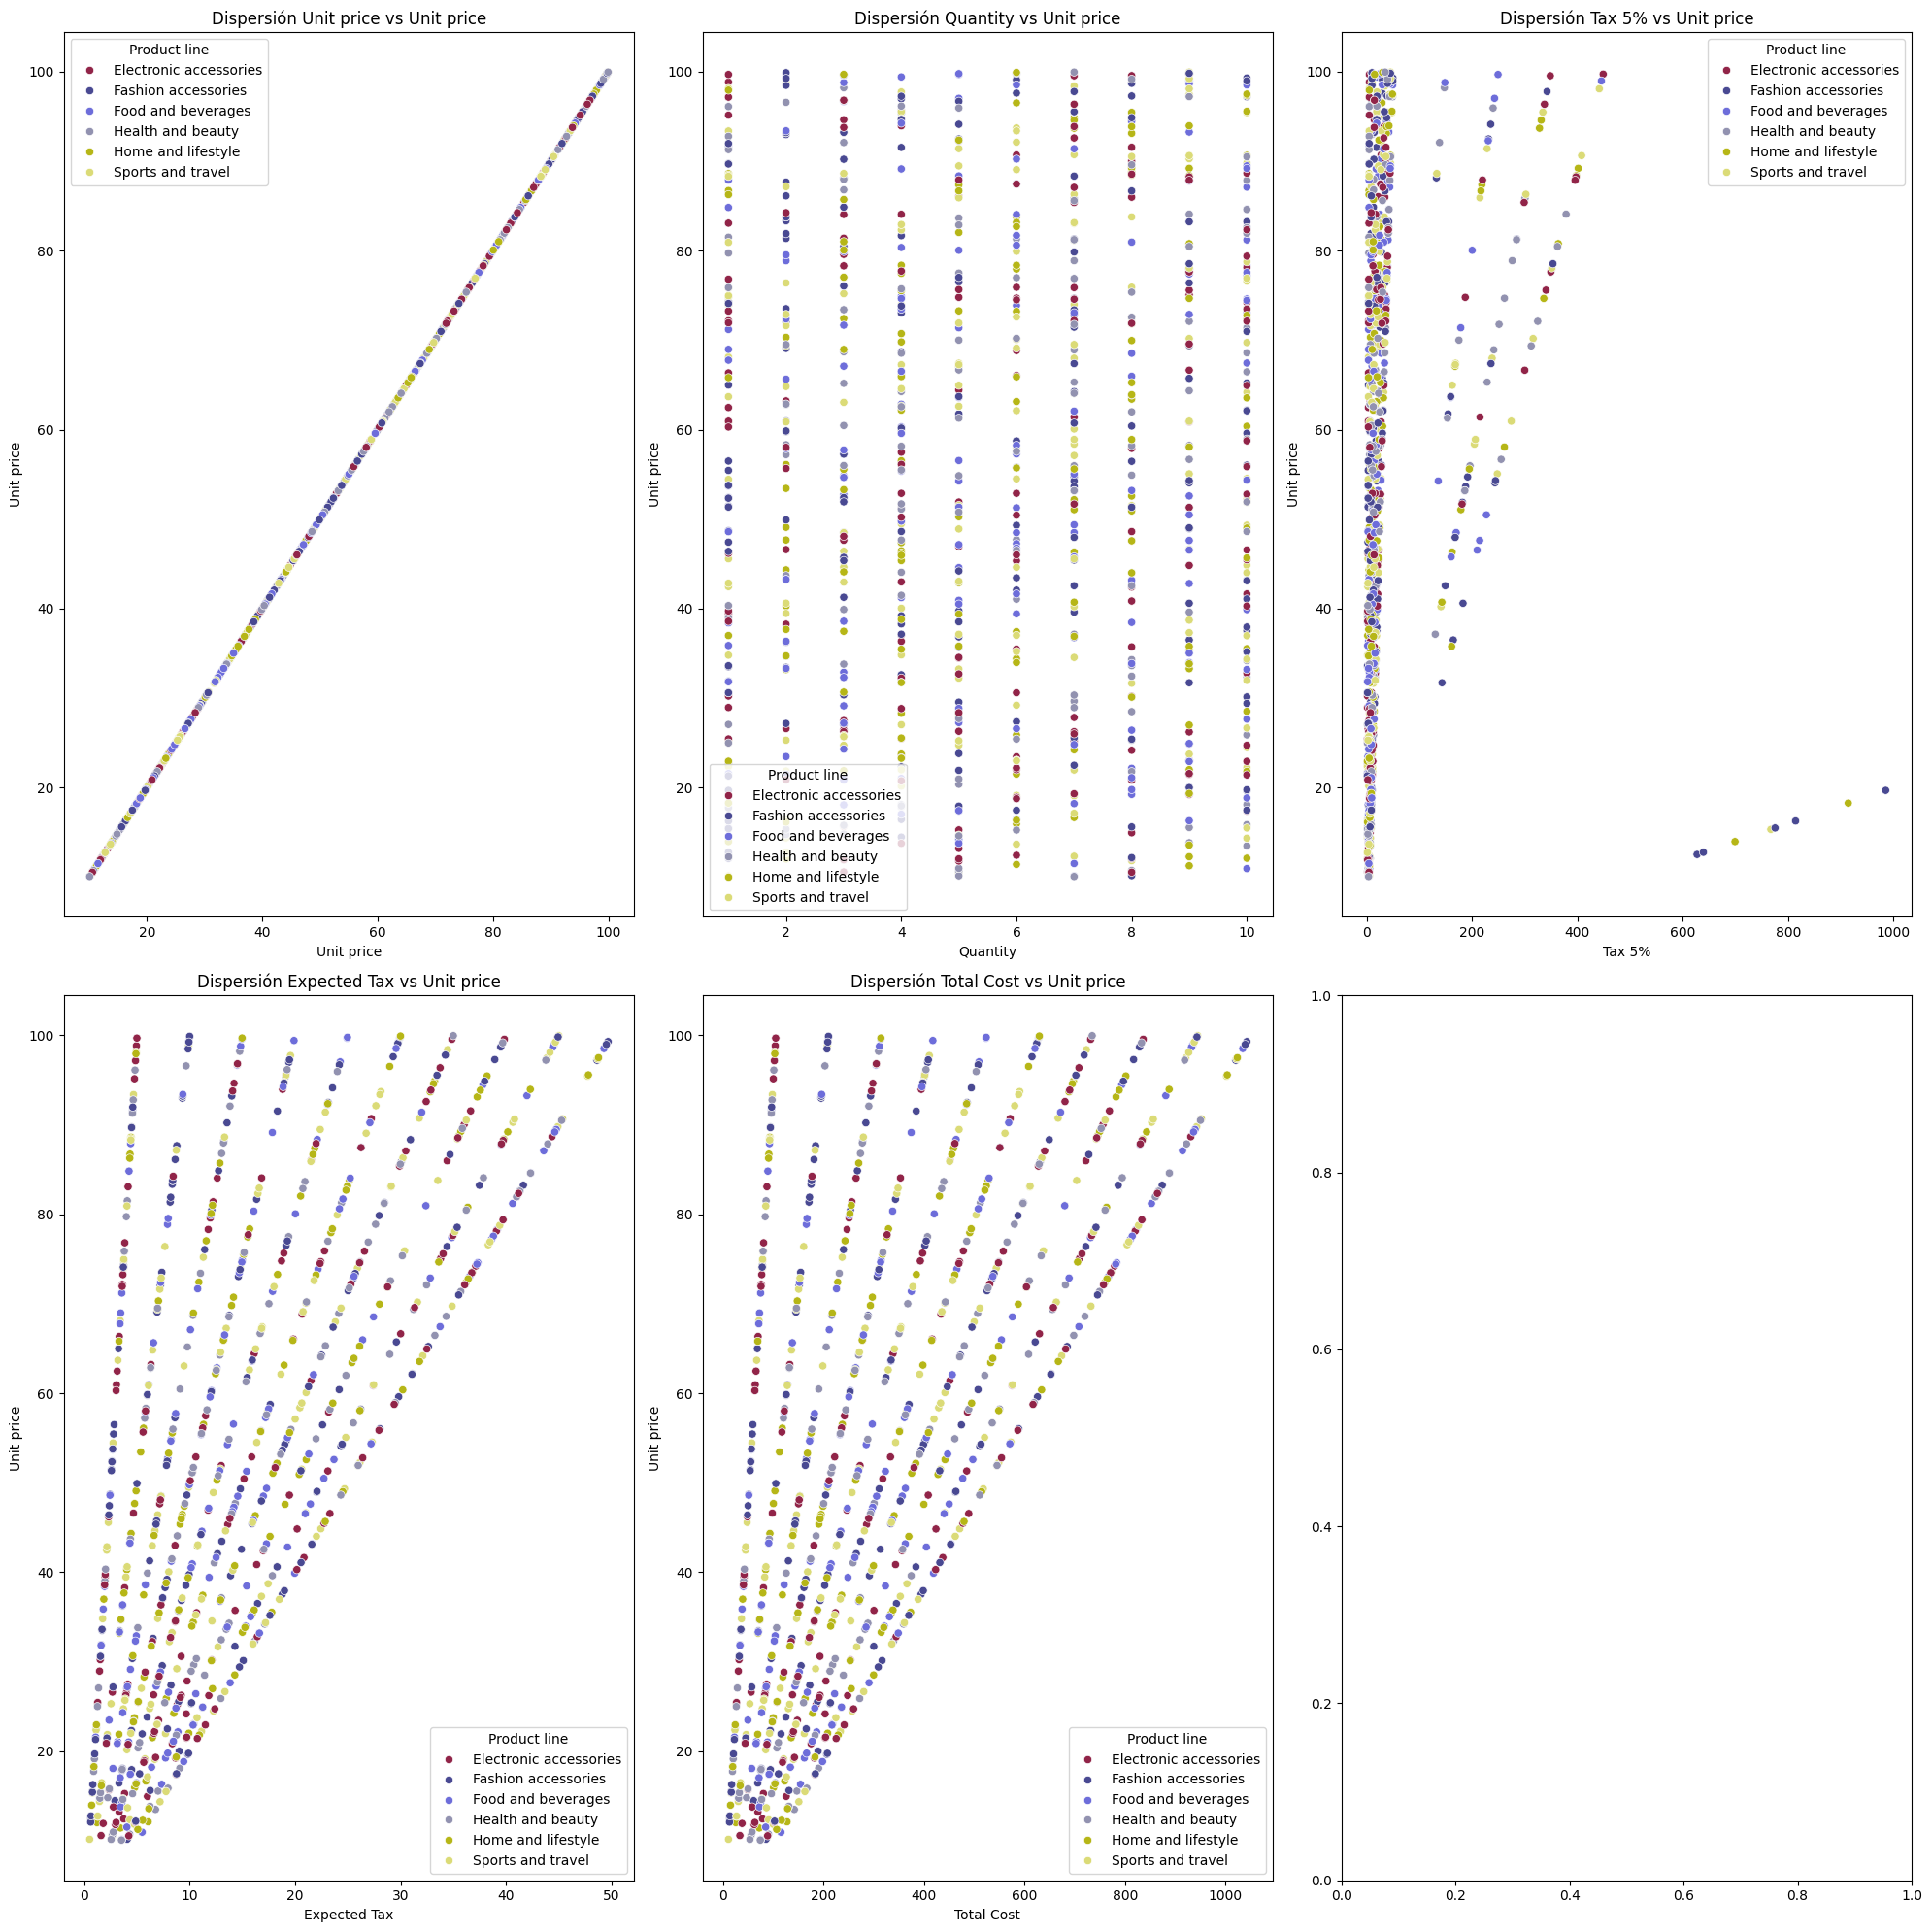

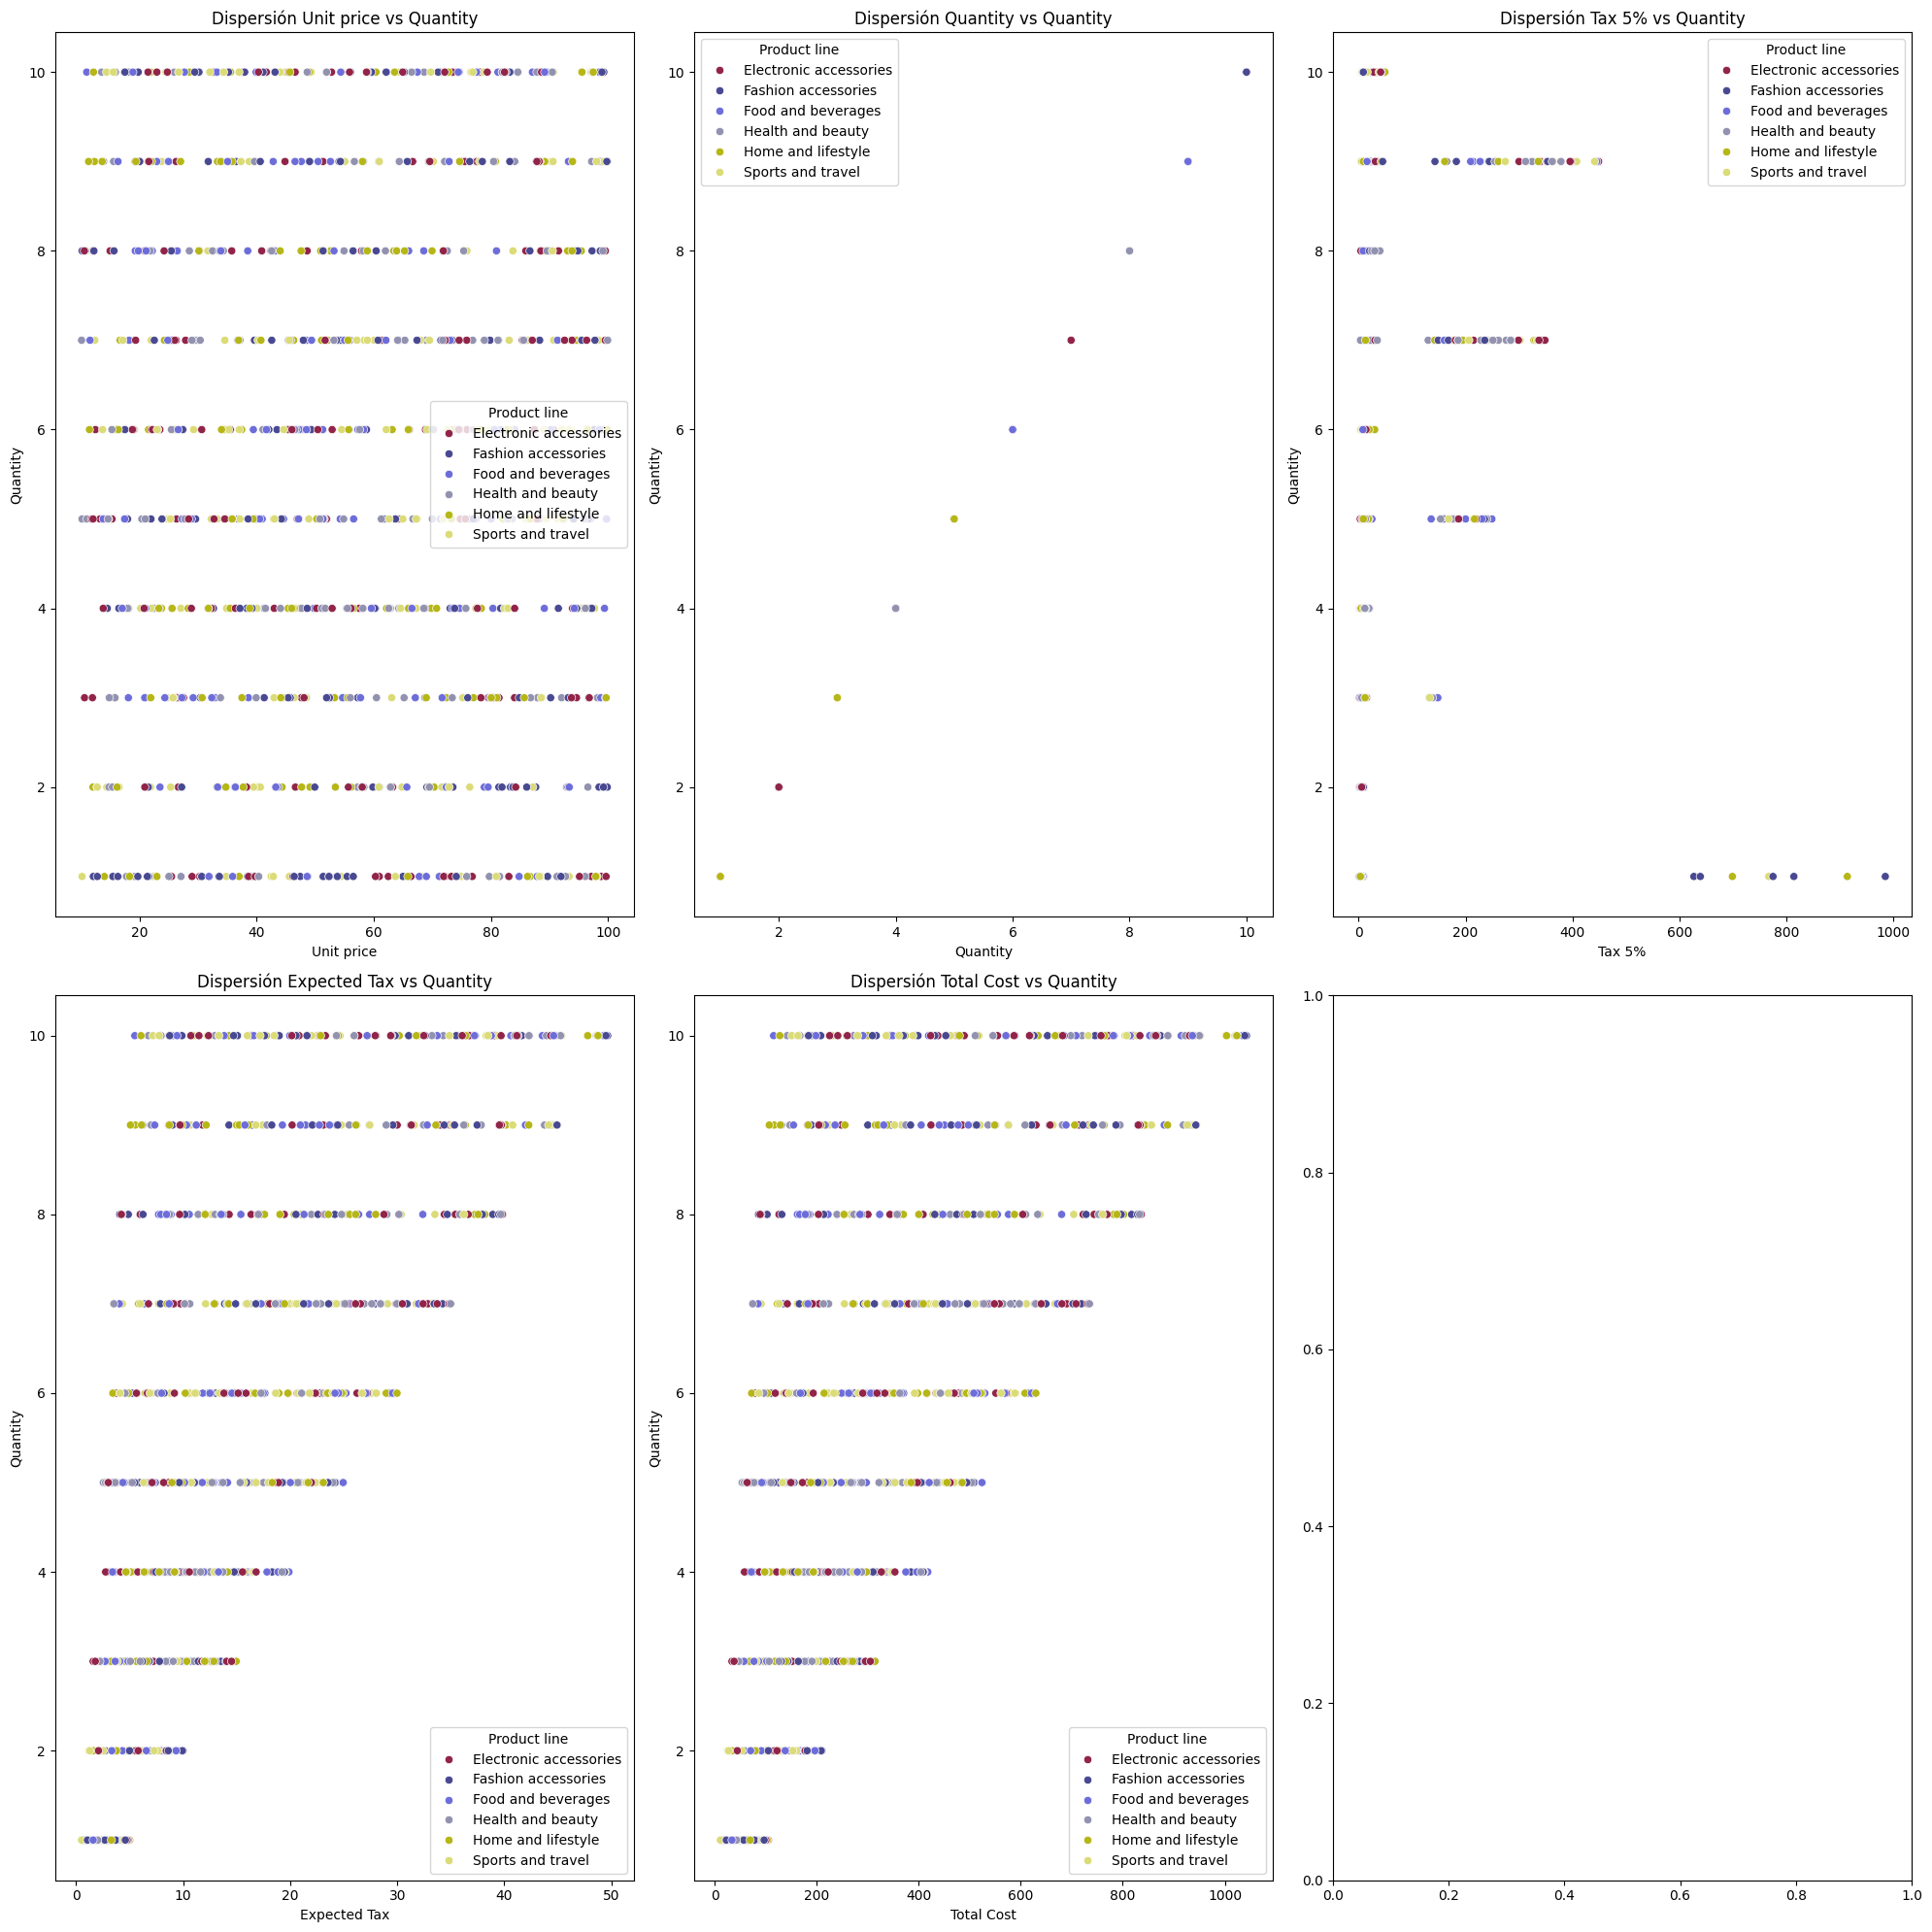

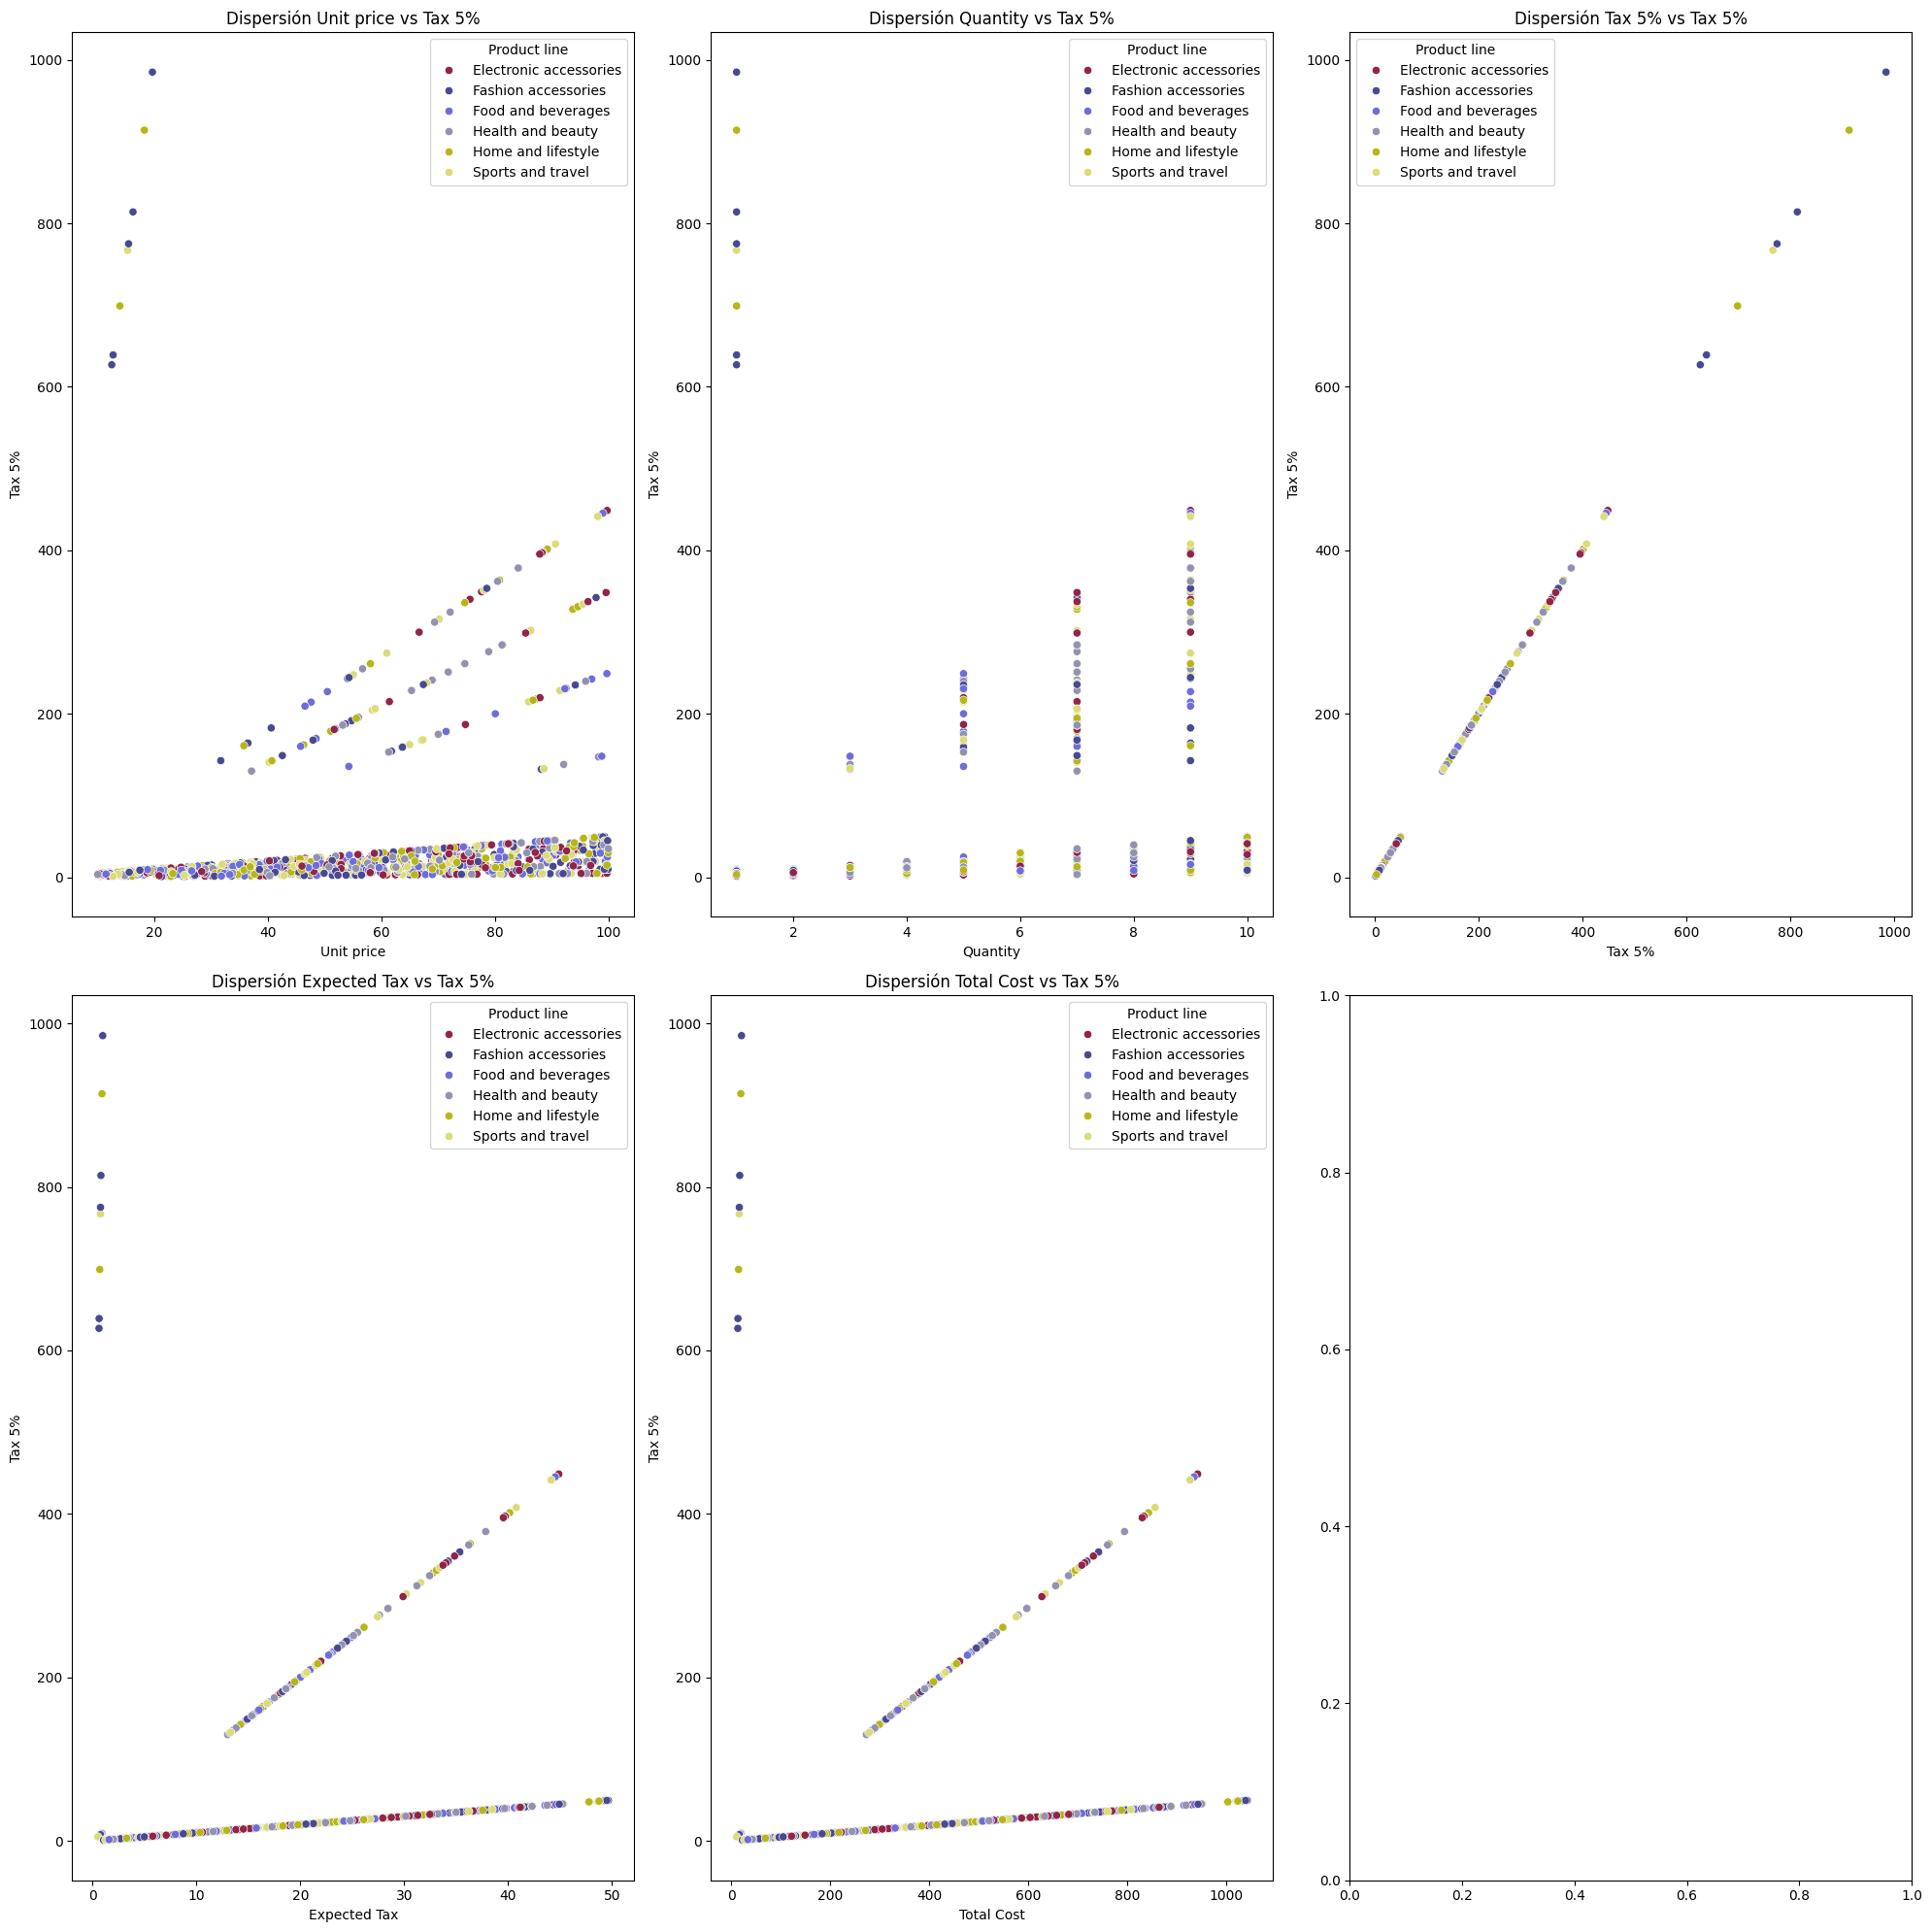

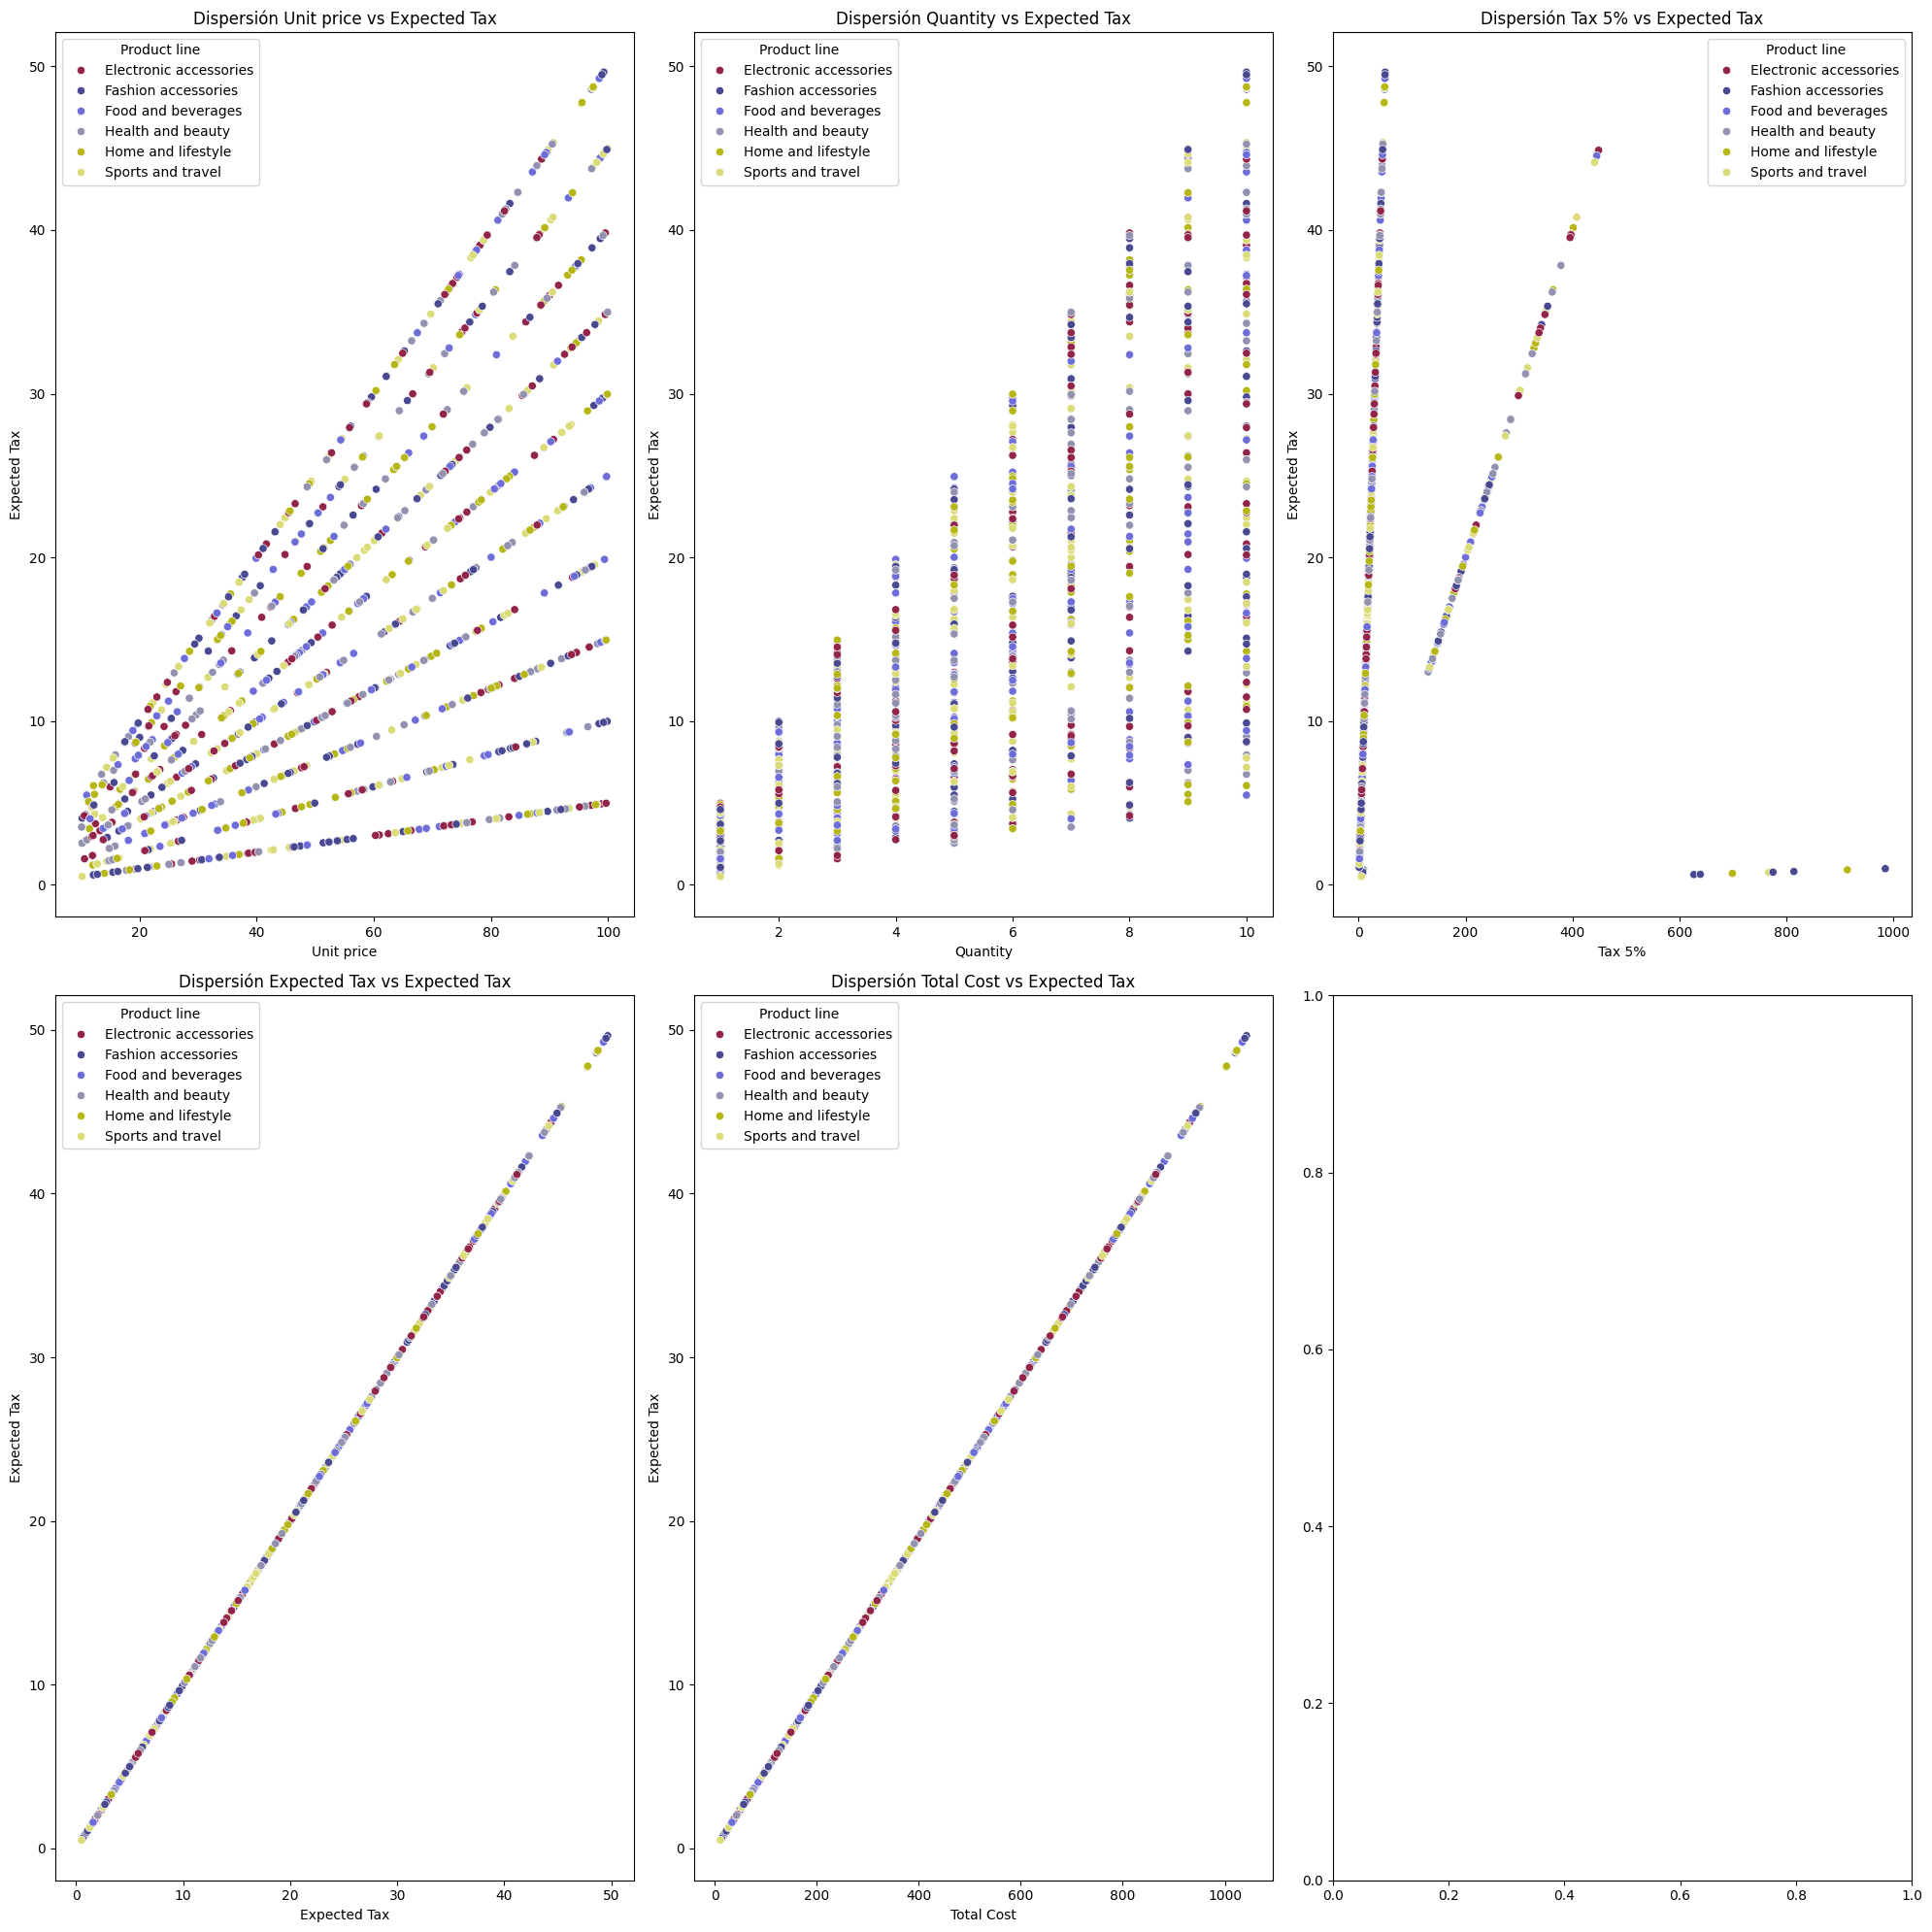

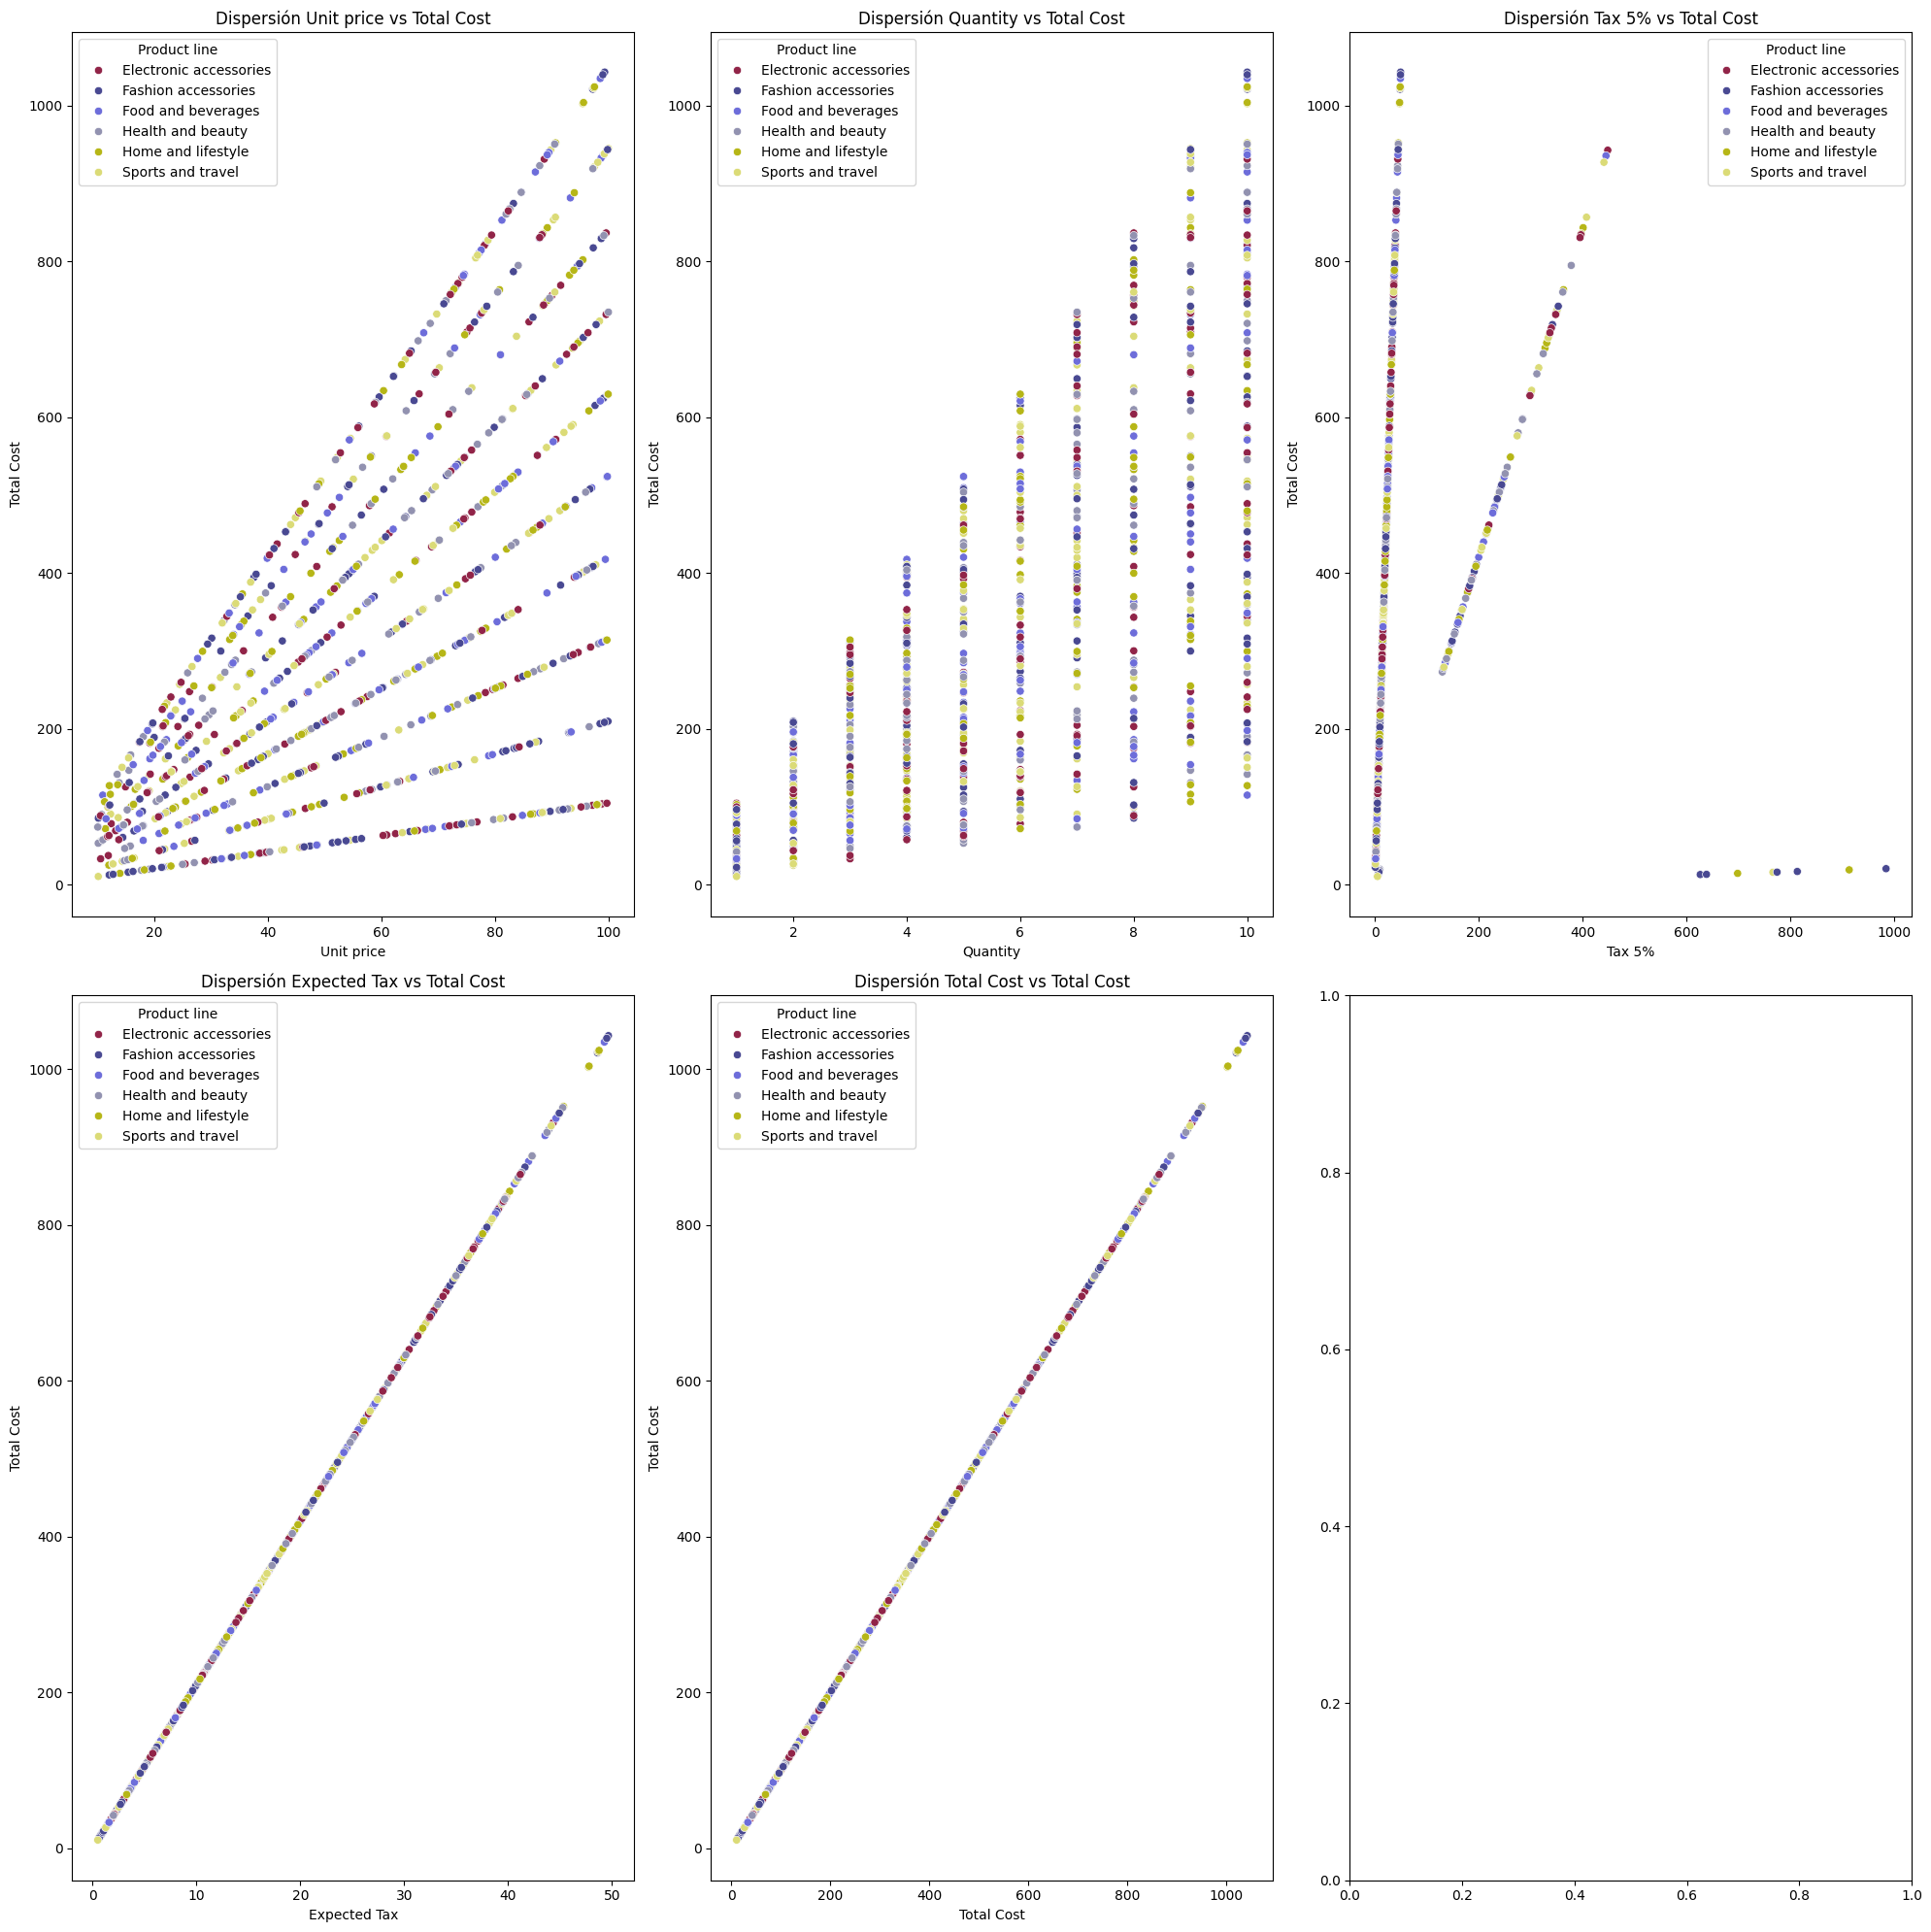

In [67]:
from utils.extra import graph_scaterplot
for i in numeric_columns:
    graph_scaterplot(df, numeric_columns, i, hue="Product line", palette=palette, figsize=(20,20))

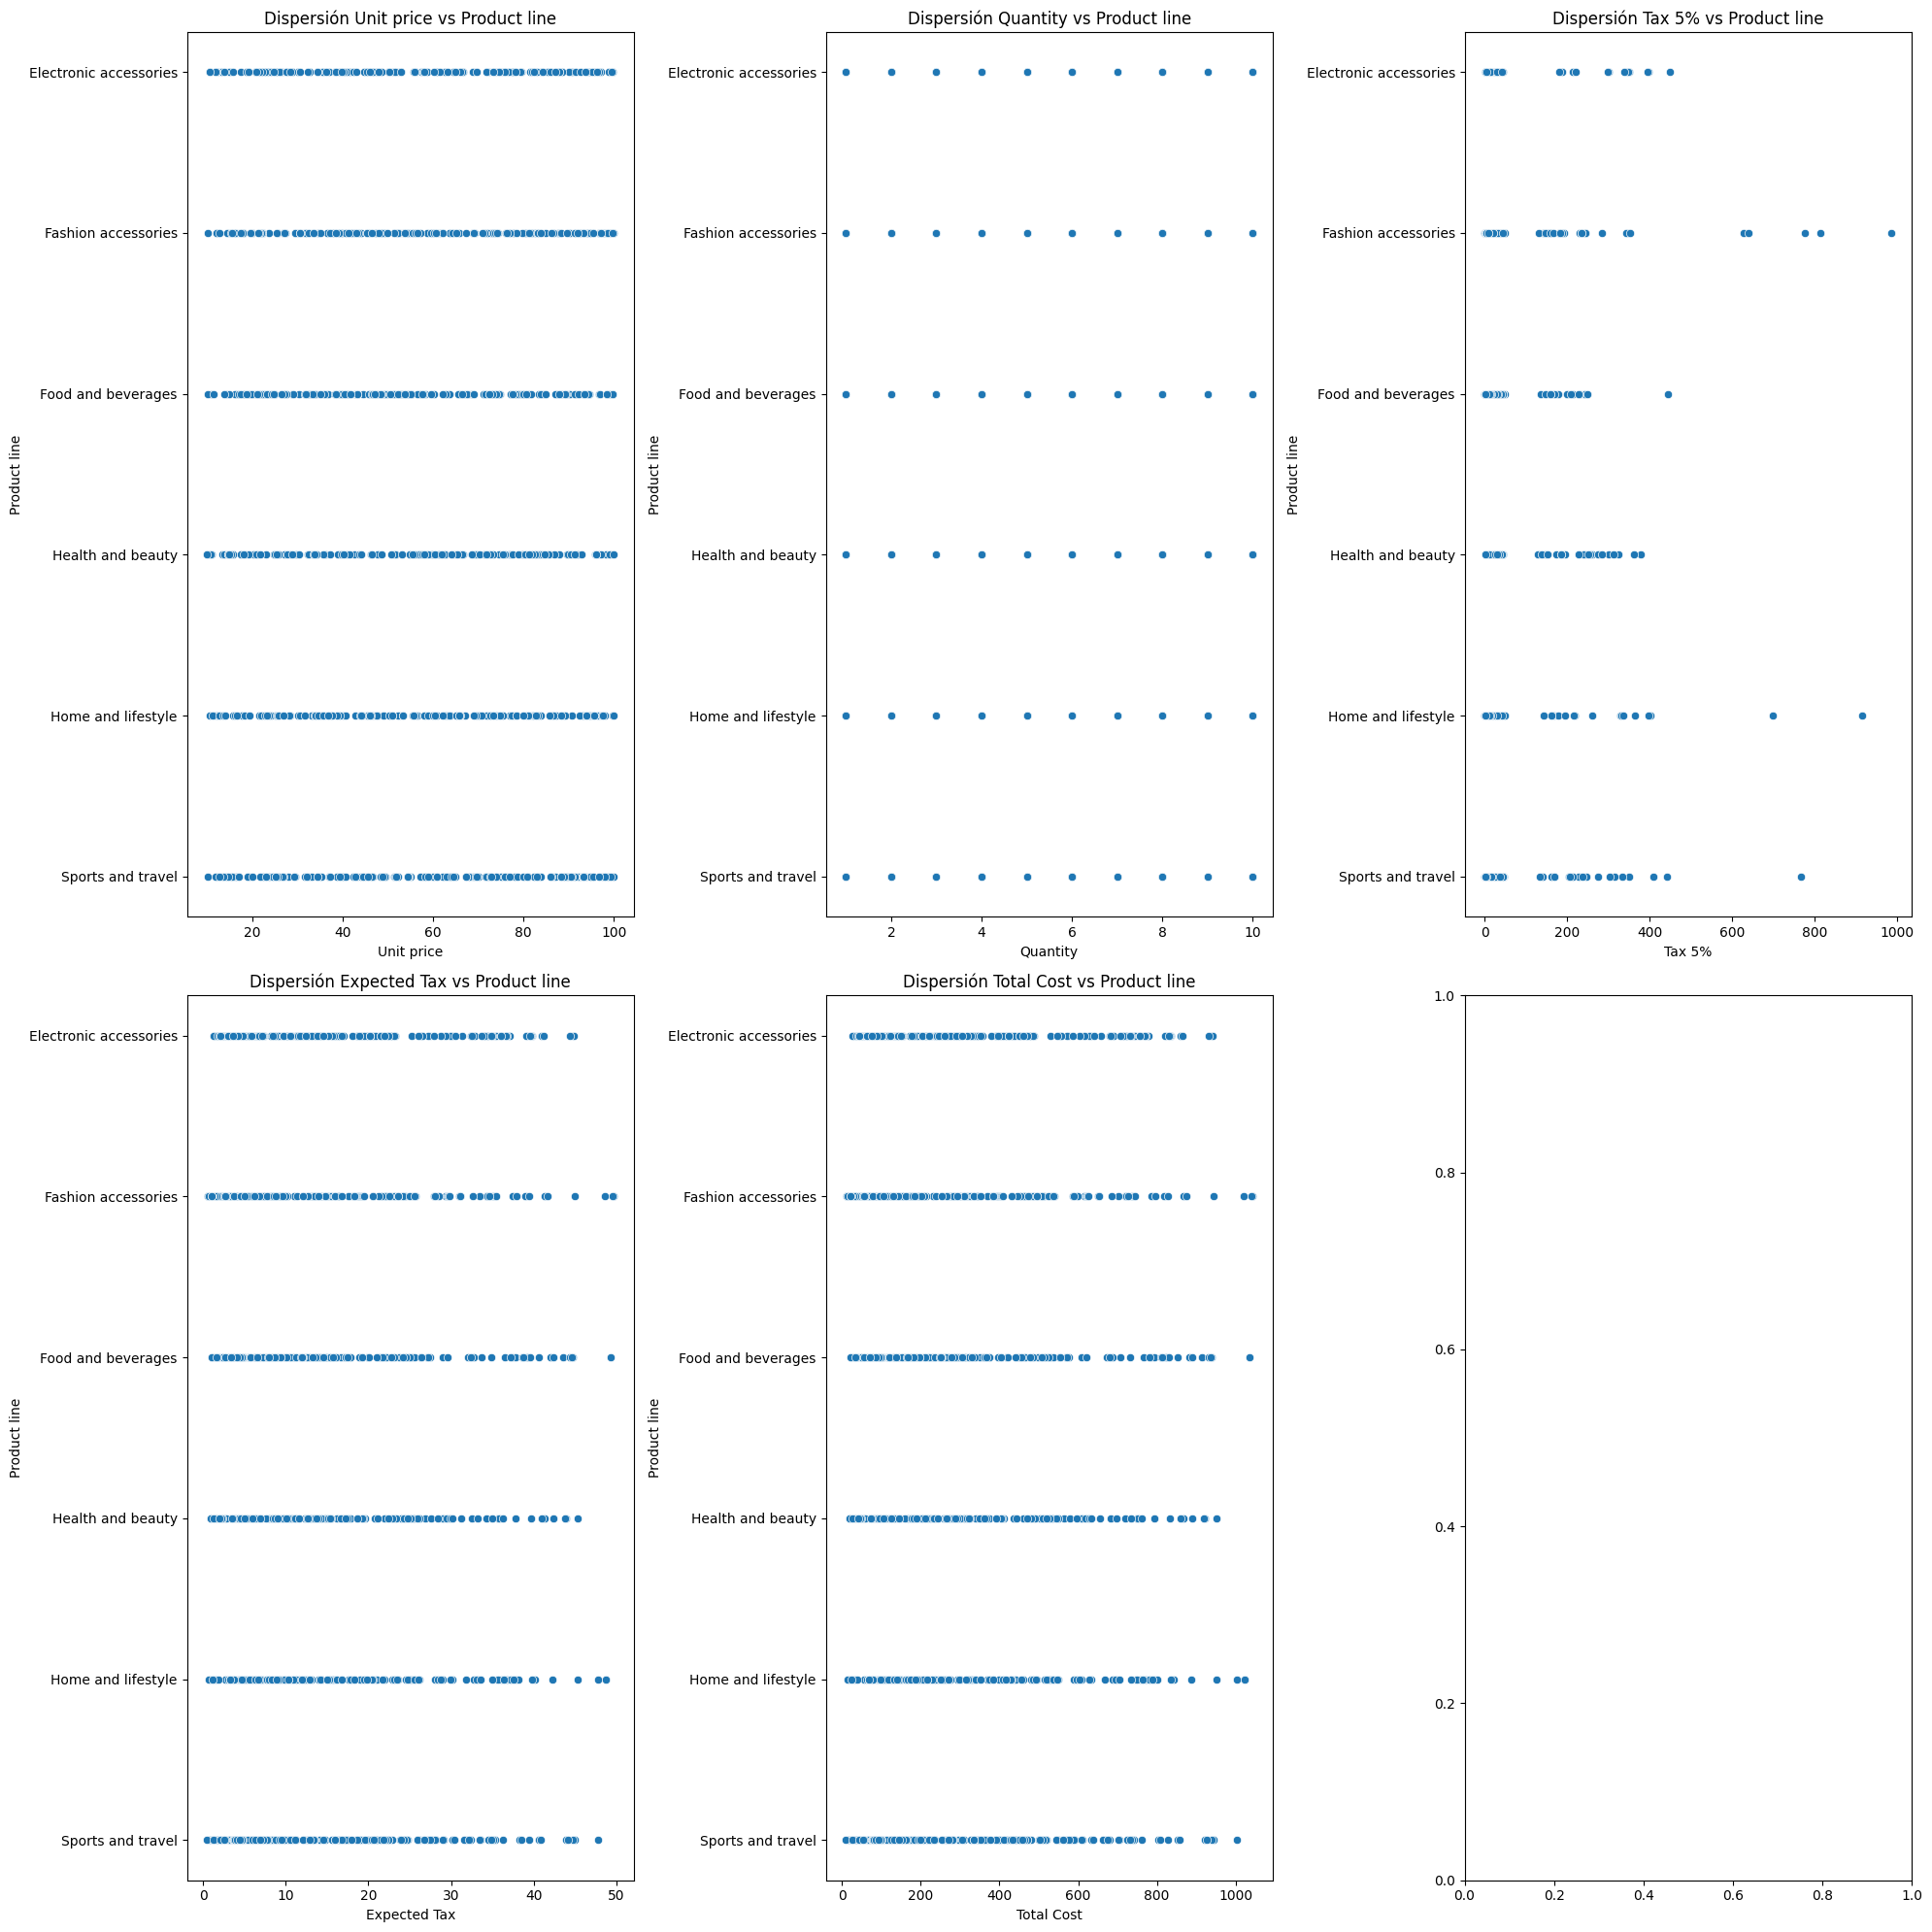

In [68]:
graph_scaterplot(df, numeric_columns, "Product line", figsize=(20,20))

/home/benja/.pyenv/versions/3.12.3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


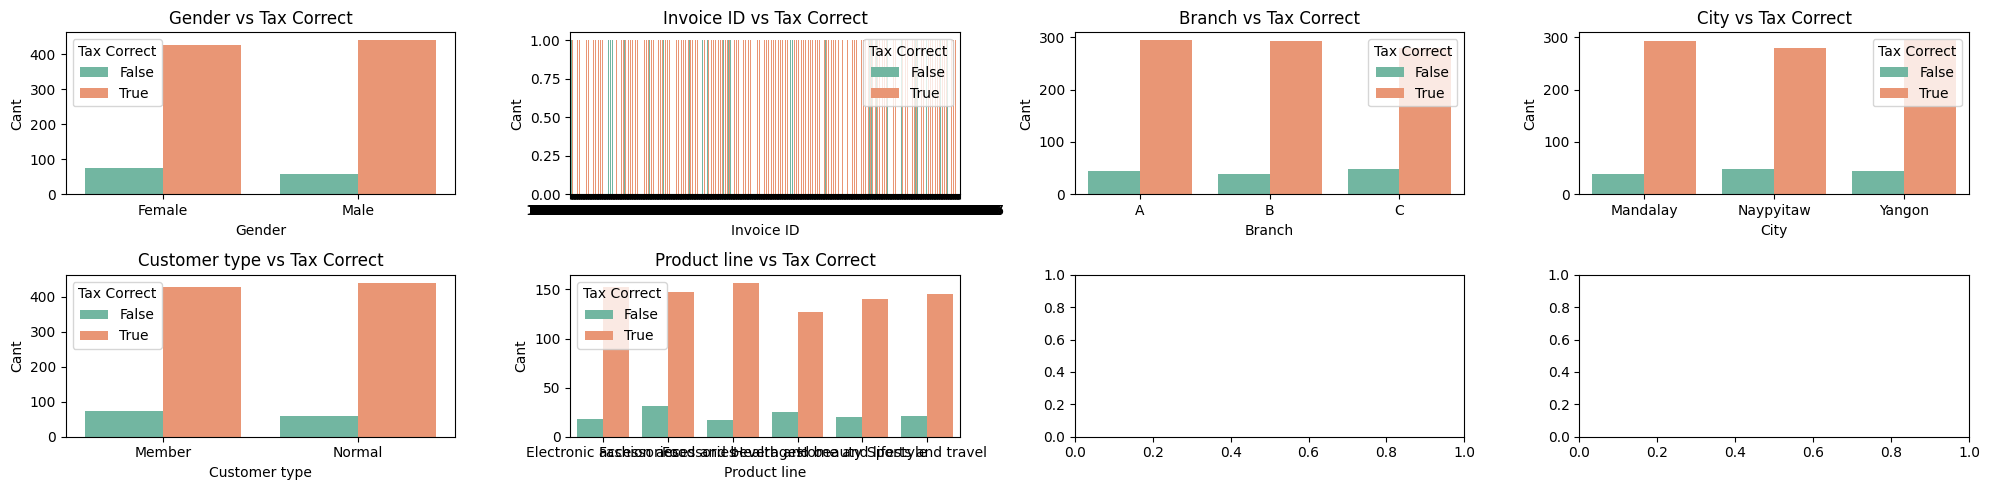

In [69]:
from utils.extra import graph_barplot, get_categoric_columns
graph_barplot(df, get_categoric_columns(df),'Tax Correct', num_columns=4, figsize=(20,5))

Se observa que el error al cargar el valor de impuesto no se debe a otra caracteristica del dataset

### Resumen

Este dataset no posee valores nulos ni duplicados, Pero pudimos observar a través de la inspección que el mismo posee errores en las entradas de Tax 5%.
Para corregirlos tuvimos que volver a generar las entradas en una columna. 
Más adelante se podría trabajar en hallar la fuente de los errores